In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

In [ ]:
df = pd.read_csv('/content/vehicle_emission_dataset.csv')
df.head()

,Vehicle Type,Fuel Type,Engine Size,Age of Vehicle,Mileage,Speed,Acceleration,Road Type,Traffic Conditions,Temperature,Humidity,Wind Speed,Air Pressure,CO2 Emissions,NOx Emissions,PM2.5 Emissions,VOC Emissions,SO2 Emissions,Emission Level
0,Motorcycle,Electric,2.747609,22,291288,49.083255,1.887738,Highway,Moderate,13.880458,52.883905,18.938861,955.411642,179.930088,1.085520,0.011548,0.096207,0.022936,Medium
1,Bus,Electric,5.743714,3,188398,23.460311,3.544147,City,Heavy,19.136947,5.697343,14.716526,1035.763062,250.505219,1.285628,0.187112,0.073321,0.028021,Medium
2,Bus,Hybrid,4.606368,17,281451,115.508350,4.646886,Highway,Free flow,8.123428,3.953116,18.644522,976.207064,404.979103,0.258189,0.132398,0.014744,0.075334,High
3,Truck,Electric,3.913024,4,151321,18.540217,3.581004,Rural,Heavy,35.994893,0.509678,11.951859,966.919462,463.568608,1.040956,0.166325,0.093490,0.025324,High
4,Truck,Hybrid,1.611297,15,91810,109.596566,3.879303,Highway,Moderate,14.793481,52.450884,2.761138,953.229351,79.514604,1.583390,0.078043,0.020396,0.024986,Low


In [ ]:
Car_measurements = df[df['Vehicle Type']=='Car']
Car_measurements.head()

,Vehicle Type,Fuel Type,Engine Size,Age of Vehicle,Mileage,Speed,Acceleration,Road Type,Traffic Conditions,Temperature,Humidity,Wind Speed,Air Pressure,CO2 Emissions,NOx Emissions,PM2.5 Emissions,VOC Emissions,SO2 Emissions,Emission Level
5,Car,Petrol,1.611172,13,72131,51.416772,3.753896,City,Moderate,11.186252,46.381560,13.508542,1033.407310,287.833438,1.733975,0.056361,0.093165,0.069062,Medium
6,Car,Petrol,1.102035,26,169449,45.343919,1.604893,City,Free flow,-7.591602,94.046019,4.029823,956.011529,337.869581,1.470222,0.042899,0.050660,0.058193,High
7,Car,Hybrid,5.304116,26,296695,27.758376,3.784652,Highway,Moderate,19.950754,34.230632,6.919372,1045.443042,57.864243,0.895289,0.110929,0.053711,0.078112,Low
8,Car,Electric,3.925798,18,90214,76.290760,3.922604,City,Moderate,20.143447,65.822740,10.192359,1006.484202,131.561709,0.589205,0.060648,0.058605,0.038697,Low
17,Car,Electric,3.528733,24,216989,38.625558,3.584754,Rural,Free flow,12.430752,27.311654,18.764270,1008.959587,51.731676,1.543046,0.096542,0.093217,0.099732,Low


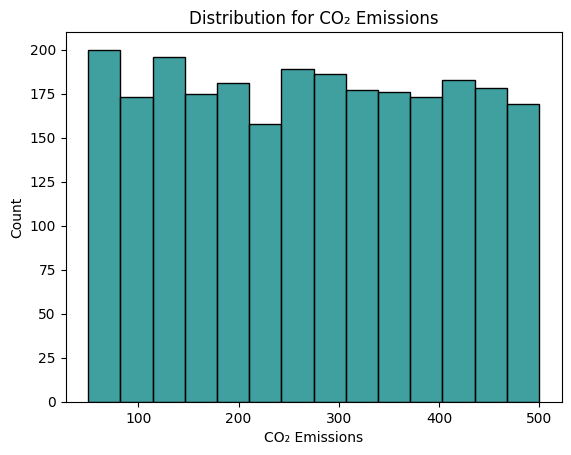

In [ ]:
# Mean CO₂ emissions

plt.figure()
sns.histplot(Car_measurements, x="CO2 Emissions", color="teal")
plt.xlabel("CO₂ Emissions")
plt.title("Distribution for CO₂ Emissions")
plt.show()

In [ ]:
print(Car_measurements['Vehicle Type'].unique())

['Car']


In [ ]:
# Electric vs Petrol type cars

Car_measurements_petrol = Car_measurements[Car_measurements['Fuel Type']=='Petrol']
Car_measurements_electric = Car_measurements[Car_measurements['Fuel Type']=='Electric']

# find the t-statistic and p-value
test_results = stats.ttest_ind(Car_measurements_petrol['CO2 Emissions'], Car_measurements_electric['CO2 Emissions'], equal_var=False, alternative='two-sided')

# Extract the t-statistic and p-value from the results
tstat = test_results[0]
pval = test_results[1]


In [ ]:
# print the results
print("The p-value is", pval, ", with a t-statistic of",round(tstat, 4))

The p-value is 0.8380340056959268 , with a t-statistic of -0.2045


In [ ]:
# The p-value of 0.83 indicates weakened or no evidence against the null hypothesis.
# The t-statistic is negative as the sample mean is less than the hypothesized mean.